In [198]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

In [199]:
##https://dashboard.saskatchewan.ca/agriculture/rm-yields/rm-yields-data
df_raw=pd.read_csv('/Users/mithu/Portfolio/PythonAssignments/rm-yields-data.csv')

In [200]:
df_raw.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


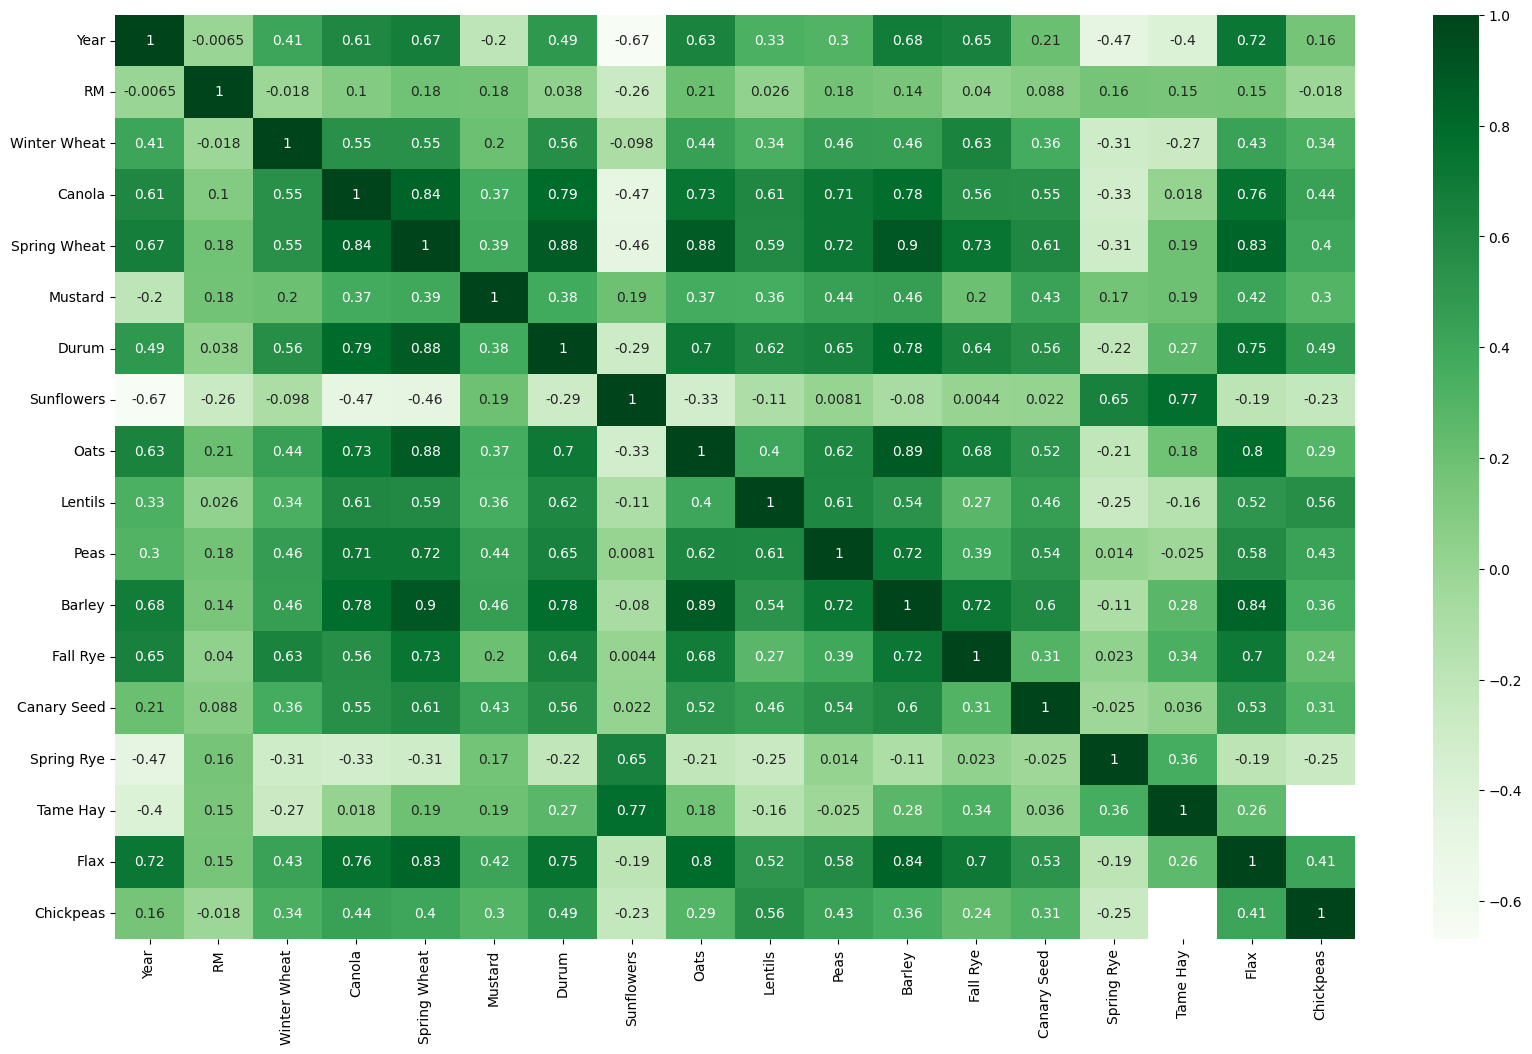

In [201]:
plt.figure(figsize=(20,12))
sb.heatmap(df_raw.corr(), annot=True, cmap='Greens')
plt.show()

In [202]:
##Weyburn No. 67
df=df_raw.loc[df_raw['RM'] == 67][['Year', 'Flax']]

In [203]:
df.head(10)

,Year,Flax
3145,1938,4.0
3146,1939,1.0
3147,1940,3.0
3148,1941,7.0
3149,1942,5.0
3150,1943,8.0
3151,1944,11.0
3152,1945,9.0
3153,1946,6.0
3154,1947,4.0


unit is Buschels per acre

In [204]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

##df.index = pd.DatetimeIndex(df.index).to_period('Y')
df=df.set_index('Year')
df.head()

,Flax
Year,
1938,4.0
1939,1.0
1940,3.0
1941,7.0
1942,5.0


In [ ]:
X = df.values
X

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1938 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Flax    85 non-null     float64
dtypes: float64(1)
memory usage: 1020.0 bytes


<Axes: xlabel='Year'>

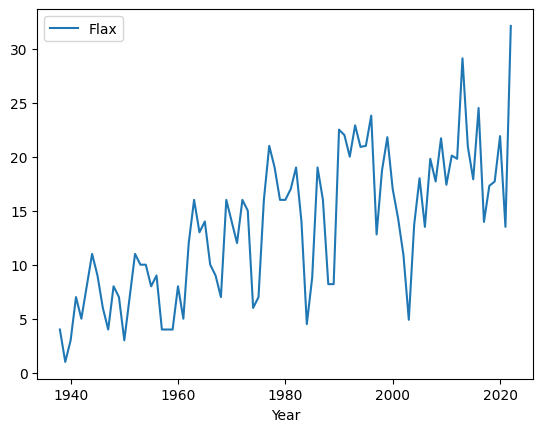

In [207]:
df.plot()

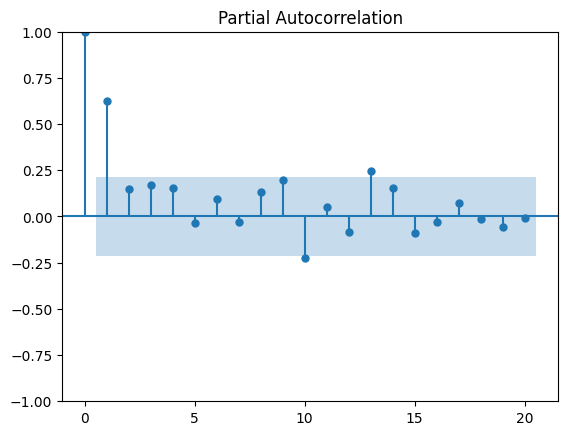

In [208]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Flax'], lags=None, method='ywm')
plt.show()

In [209]:
from statsmodels.tsa.ar_model import AutoReg

Estimating and Forecasting AR Model

In [210]:
len(X)

85

In [211]:
train = X[:len(X)-10]
test = X[len(X)-10:]
train1 = df[:len(df)-10]
test1 = df[len(df)-10:]

In [212]:
test

array([[29.1 ],
       [20.92],
       [17.9 ],
       [24.5 ],
       [13.96],
       [17.3 ],
       [17.7 ],
       [21.9 ],
       [13.5 ],
       [32.1 ]])

In [ ]:
train

In [ ]:
df.index

In [215]:
model = AutoReg(train, lags=3)
model_fit = model.fit()

In [216]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   75
Model:                     AutoReg(3)   Log Likelihood                -202.294
Method:               Conditional MLE   S.D. of innovations              4.018
Date:                Mon, 31 Jul 2023   AIC                            414.587
Time:                        15:42:24   BIC                            425.970
Sample:                             3   HQIC                           419.119
                                   75                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3155      1.258      2.635      0.008       0.850       5.781
y.L1           0.7293      0.111      6.545      0.000       0.511       0.948
y.L2          -0.2864      0.136     -2.101      0.0

Make predictions on the Test set and compare

In [217]:
##pred = model_fit.predict(start=len(train), end = len(X)-1, dynamic= False)
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pred

array([17.57139713, 16.89661923, 16.946641  , 16.46270153, 15.87936507,
       15.60854674, 15.42312068, 15.17864619, 14.96673087, 14.82281477])

In [218]:
from matplotlib import pyplot

In [219]:
for i in range(len(pred)):
	print('predicted=%f, expected=%f' % (pred[i], test[i]))

predicted=17.571397, expected=29.100000
predicted=16.896619, expected=20.920000
predicted=16.946641, expected=17.900000
predicted=16.462702, expected=24.500000
predicted=15.879365, expected=13.960000
predicted=15.608547, expected=17.300000
predicted=15.423121, expected=17.700000
predicted=15.178646, expected=21.900000
predicted=14.966731, expected=13.500000
predicted=14.822815, expected=32.100000


C:\Users\mithu\AppData\Local\Temp\ipykernel_16992\796907508.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (pred[i], test[i]))


In [ ]:
test1

In [ ]:
pred1 = pd.DataFrame(pred,  columns=['Flax'])
pred1


In [224]:
years = list(test1.index.values)
pred1['Year'] = years
pred1 =pred1.set_index('Year')

In [225]:
pred1

,Flax
Year,
2013,17.571397
2014,16.896619
2015,16.946641
2016,16.462702
2017,15.879365
2018,15.608547
2019,15.423121
2020,15.178646
2021,14.966731


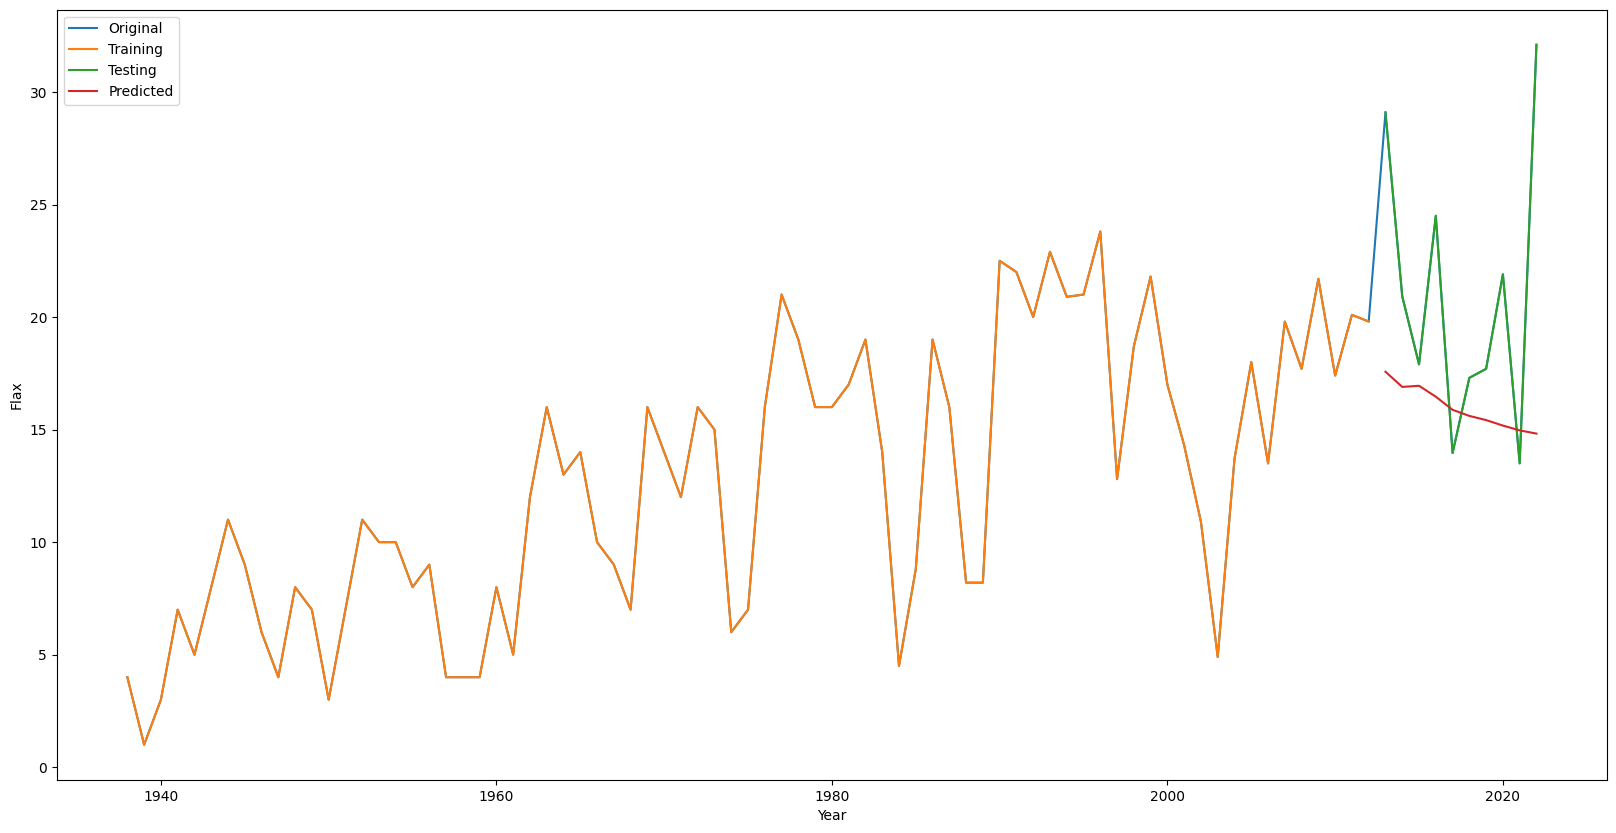

In [226]:

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Flax'], label='Original')
ax.plot(train1, label='Training')
ax.plot(test1, label='Testing')
ax.plot(pred1, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Flax')
ax.legend()
plt.show()

Calculate error

##take the root mean square. difference between prediction and actual value and squaring it, and taking the mean of that

In [227]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

7.564135897223033


<Axes: xlabel='Year'>

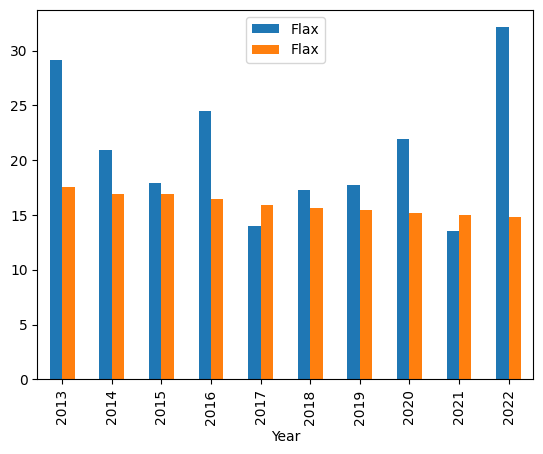

In [228]:
pd.concat([test1, pred1], axis=1).rename(columns={0: 'Predicted'}).plot(kind='bar')

XGBoost Time Series

In [123]:
import xgboost as xgb

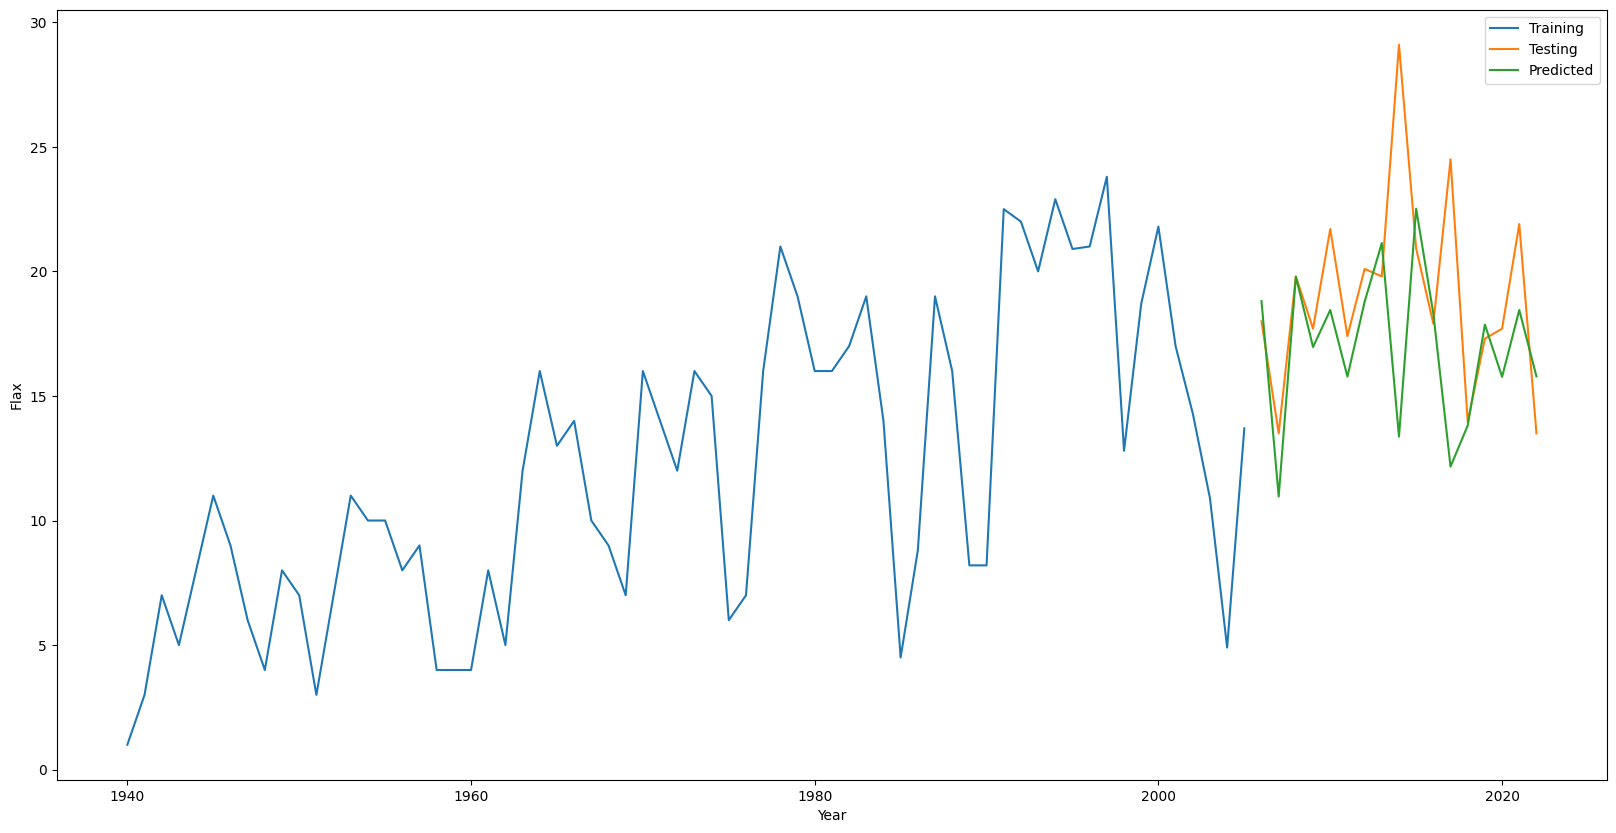

MAE: 5.089997318492217
RMSE: 6.313711331063426


In [124]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df['lag1'] = df['Flax'].shift(1)
df['lag2'] = df['Flax'].shift(2)
df.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Flax']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Flax']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) # grid search

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Flax')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)

K means Clustering

In [242]:
gdf=gpd.read_file('RuralMunicipality.shp')

In [250]:
df_K = pd.DataFrame()

df_K['Flax Mean']= df_raw.loc[(df_raw['Year'] > 2012) & (df_raw['Year'] <= 2022)].groupby('RM').mean()['Flax']
df_K['Flax Std']= df_raw.loc[(df_raw['Year'] > 2012) & (df_raw['Year'] <= 2022)].groupby('RM').std()['Flax']

In [269]:
df_K

,RM,Flax Mean,Flax Std
0,1,24.365556,5.107363
1,2,22.788000,4.679971
2,3,23.493000,4.885125
3,4,22.305000,3.978859
4,5,20.924000,4.797324
...,...,...,...
290,520,NaN,NaN
291,555,NaN,NaN
292,561,NaN,NaN
293,588,NaN,NaN


In [251]:
df_K = df_K.reset_index()


In [252]:
df_K['RM']=df_K['RM'].astype('string')

<Axes: >

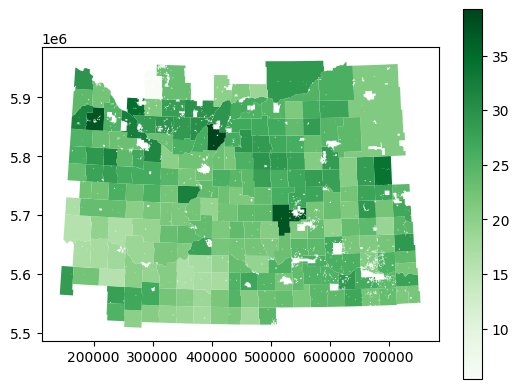

In [272]:
gds = gpd.GeoDataFrame(pd.merge(df_K, gdf.rename(columns={'RMNO':'RM'})[['RM', 'geometry']], on='RM'))
gds=gds.loc[gds['RM']!='67']
gds.plot('Flax Mean', legend=True, cmap='Greens')

<Axes: >

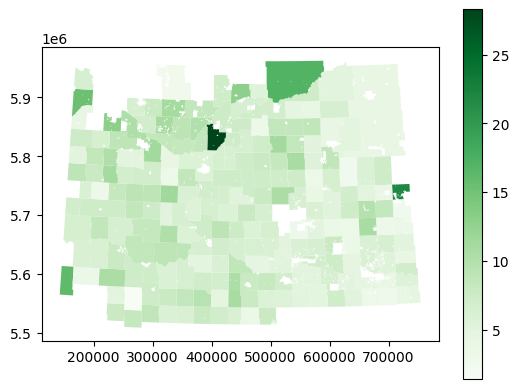

In [271]:
gds.plot('Flax Std', legend=True, cmap='Greens')

In [273]:
gds.isna().sum()

RM            0
Flax Mean    16
Flax Std     21
geometry      0
dtype: int64

<Axes: >

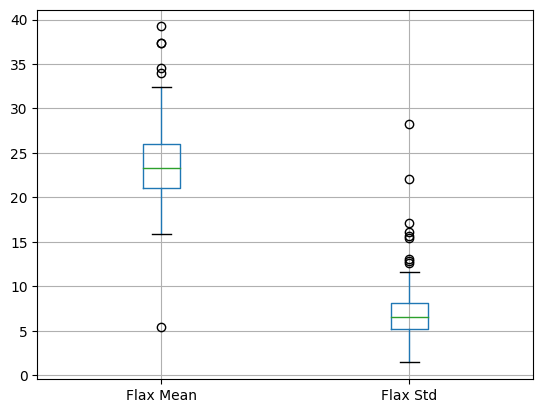

In [274]:
df_K.boxplot()

In [257]:
from scipy.stats import zscore # (std - mean) / std data standardization

In [276]:
zscore(df_K.set_index('RM')).sort_values('Flax Mean')

,Flax Mean,Flax Std
RM,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
520,NaN,NaN
555,NaN,NaN
561,NaN,NaN


<Axes: xlabel='Year'>

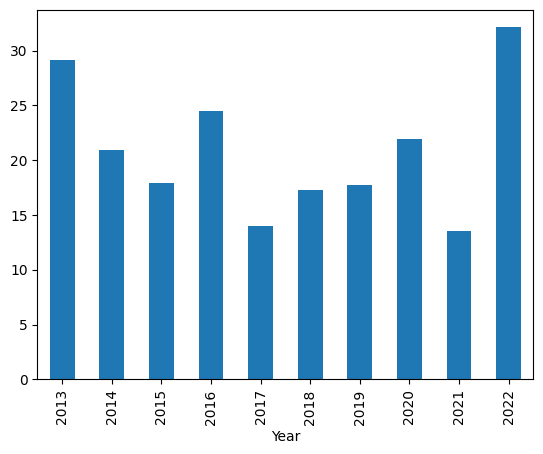

In [277]:
df_raw.loc[(df_raw['RM']== 67) & (df_raw['Year'] > 2012)]\
    .set_index('Year')\
    ['Flax'].plot(kind = 'bar')

array([[<Axes: title={'center': 'Flax Mean'}>,
        <Axes: title={'center': 'Flax Std'}>]], dtype=object)

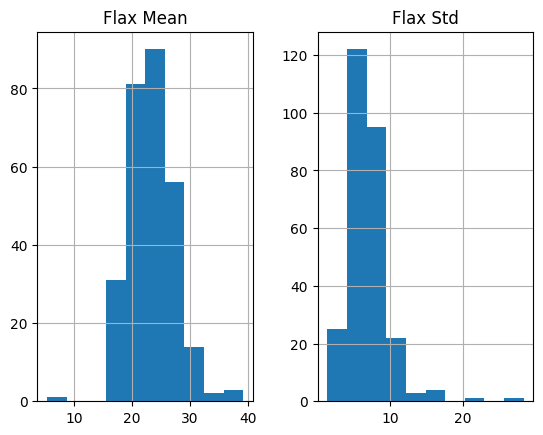

In [267]:
df_K.hist()

Unsupervised Machine Learning
K Means

In [ ]:
# Importing library
from sklearn.cluster import KMeans 

# Let's define our features
X = df_K.set_index('RM')

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [ ]:
max_clusters = 10

# Perform K-means clustering for different number of clusters
inertia = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()